In [1]:
import cv2


In [2]:
cv2.__version__

'3.4.2'

In [3]:
import matplotlib.pyplot as plt
import urllib

In [4]:
trl ='https://scontent-ort2-1.cdninstagram.com/vp/29cc526e7ebd2824992668225ea8190f/5DD09894/t51.2885-15/e35/67479517_130505938194354_2119924044209390637_n.jpg?_nc_ht=scontent-ort2-1.cdninstagram.com'
tname='ttr.jpg'

In [5]:
urllib.request.urlretrieve(trl,tname)

('ttr.jpg', <http.client.HTTPMessage at 0x1fc5366d908>)

In [6]:
image=cv2.imread('ttr.jpg')

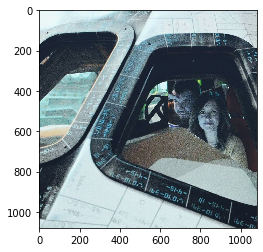

In [7]:
plt.imshow(image)

In [8]:
from pylab import rcParams

In [9]:
def plt_show(image,title='',gray=False,size=(12,10)):
    temp=image
    if gray==False:
        temp=cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
        rcParams['figure.figsize']=size[0],size[1]
        plt.axis("off")
        plt.title(title)
        plt.imshow(temp,cmap='gray')
        plt.show()

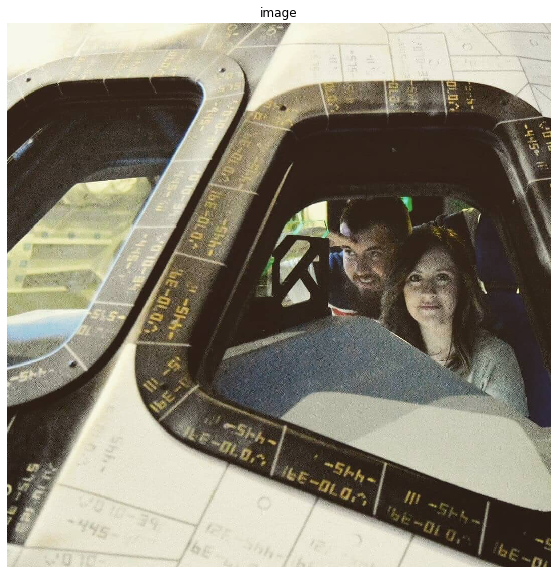

In [10]:
plt_show(image,'image')

In [29]:
haarcascade='https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
cascade_name='haarcascade_frontalface_default.xml'

In [55]:
hareye ='https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml'
cas_eye='haarcascade_eye.xml'

In [16]:
urllib.request.urlretrieve(haarcascade,cascade_name)

('haarcascade_frontalface_default.xml',
 <http.client.HTTPMessage at 0x1fc571cc358>)

In [30]:
detector=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [31]:
eyedetect=cv2.CascadeClassifier('haarcascade_eye.xml')

In [32]:
face_list =detector.detectMultiScale(image)

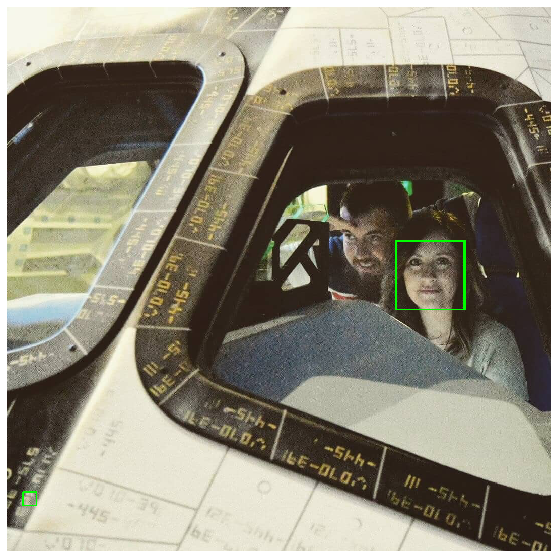

In [33]:
for face in face_list:
    (x,y,w,h)=face
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
plt_show(image)

In [36]:
import numpy as np

In [61]:
cap=cv2.VideoCapture(0)
while True:
    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=detector.detectMultiScale(gray,1.3,5)
    for face in faces:
        (x,y,w,h)=face
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eye=eyedetect.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eye:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
    cv2.imshow('img',img)
    k=cv2.waitKey(30) & 0xff
    if k==27:
        break
    
cap.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\objdetect\src\cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [62]:
cap.release()

In [63]:
cv2.destroyAllWindows()